## Exercise 1.23.2

Poisson distribution is generated by setting time interval to be exponential and drawing out sample. Below the threshold time is set to be 1. A random number drawn from exponential series and added to the cumulative time and simultaneously the count is also increased, when the time exceed threshold time it moves to the next time interval. 

The plot below shows the histogram for poisson sample in blue and real poisson distribution in red for lambda = 8

In [63]:
import numpy as np #Numpy library for mathematical operations
import matplotlib.pyplot as plt #Plotting library
from scipy.stats import poisson, gamma

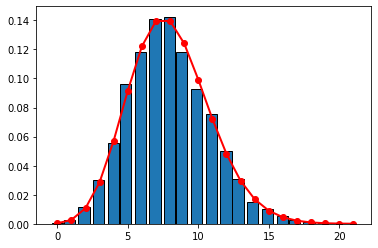

In [57]:
def poisson_samples(lam, n_samples): # Generating poisson samples from time exponential defination
    samples = [] # Store the samples.
    for i in range(n_samples): #Loop through number of times data needs to be generated
        t = 0 #Initialize the time
        count = 0 # Initialize the count
        while True: # loop
            t += np.random.exponential(1/lam) #Add a random number drawn from exponential distribution
            if t > 1: #if time more than 1 which is the threshold then break and move to the next time frame
                break
            count += 1 #increase count if t <1
        samples.append(count) #Append the count to the array
    return samples #return the full sample


lam = 8 #define lamda value
n_samples = 10000 # number of samples drawn
samples = poisson_samples(lam, n_samples) #calling the poisson_samples to generate the poisson samples
hist, bins = np.histogram(samples, bins=100) # Generating histogram and time bins
histNormal = hist/np.sum(hist) # Normalizing the histogram
plt.plot(range(max(samples)+1), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(samples)+1)], 'ro-', linewidth=2) #Plotting true Poisson function.
plt.bar(bins[:-1], histNormal, edgecolor='black') #Plotting the histogram
plt.show() #Show the plot

Poisson Distribution for lambda = 5

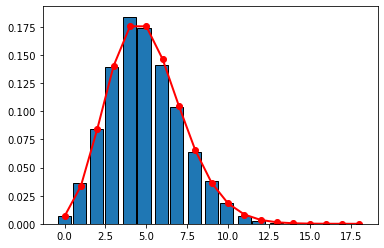

In [61]:
lam = 5 #define lamda value
n_samples = 10000 # number of samples drawn
samples = poisson_samples(lam, n_samples) #calling the poisson_samples to generate the poisson samples
hist, bins = np.histogram(samples, bins=100) # Generating histogram and time bins
histNormal = hist/np.sum(hist) # Normalizing the histogram
plt.plot(range(max(samples)+1), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(samples)+1)], 'ro-', linewidth=2) #Plotting true Poisson function.
plt.bar(bins[:-1], histNormal, edgecolor='black') #Plotting the histogram
plt.show() #Show the plot

Poisson Distribution for lambda = 10

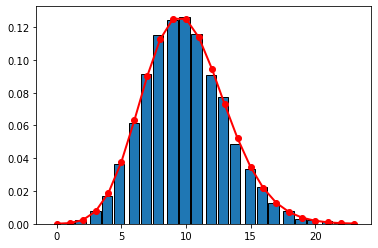

In [62]:
lam = 10 #define lamda value
n_samples = 10000 # number of samples drawn
samples = poisson_samples(lam, n_samples) #calling the poisson_samples to generate the poisson samples
hist, bins = np.histogram(samples, bins=100) # Generating histogram and time bins
histNormal = hist/np.sum(hist) # Normalizing the histogram
plt.plot(range(max(samples)+1), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(samples)+1)], 'ro-', linewidth=2) #Plotting true Poisson function.
plt.bar(bins[:-1], histNormal, edgecolor='black') #Plotting the histogram
plt.show() #Show the plot

## Exercise 4.1

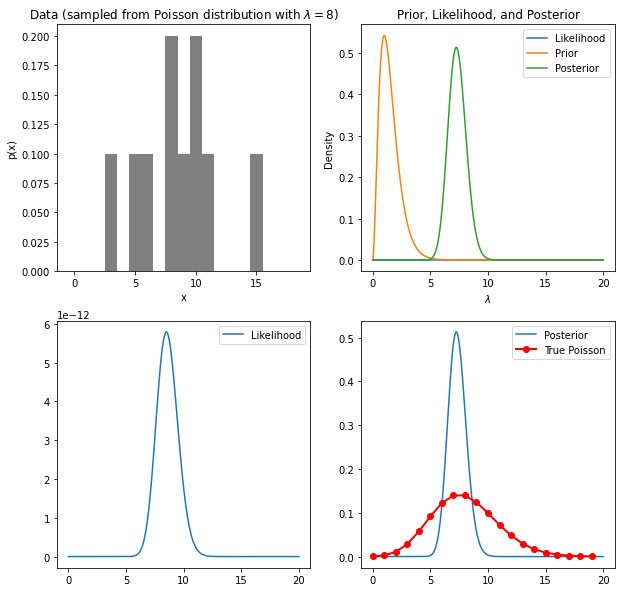

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma

# set the true parameter
lam = 8 #Lambda value

# generate some data from a Poisson distribution
# data = poisson.rvs(lam, size=10) #To check sanity using scipy
data=poisson_samples(lam, 10) # Data generated using 

# define the likelihood function
def likelihood(lam, data):
    return np.prod(poisson.pmf(data, lam)) #Invoking scipy function instead of writing the full poisson function

# define the prior distribution (gamma)
alpha = 3
beta = 2
prior = gamma(alpha, scale=1/beta)

# compute the posterior distribution using Bayes' theorem
lam_vals = np.linspace(0, 20, 700) # lam_vals are the theta
likelihood_vals = [likelihood(lam, data) for lam in lam_vals] #Generating the likelihood_vals
posterior_unscaled = likelihood_vals * prior.pdf(lam_vals) #Prosterior without scaling
posterior = posterior_unscaled / np.trapz(posterior_unscaled, lam_vals) #Normalizing the prosterior making area=1
# plot the results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].hist(data, bins=np.arange(20)-0.5, density=True, color='gray')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('p(x)')
axs[0,0].set_title('Data (sampled from Poisson distribution with $\lambda=$'+str(lam)+str(")"))
axs[0,1].plot(lam_vals, likelihood_vals, label='Likelihood')
axs[0,1].plot(lam_vals, prior.pdf(lam_vals), label='Prior')
axs[0,1].plot(lam_vals, posterior, label='Posterior')
axs[0,1].set_xlabel('$\lambda$')
axs[0,1].set_ylabel('Density')
axs[0,1].set_title('Prior, Likelihood, and Posterior')
axs[0,1].legend()
axs[1,0].plot(lam_vals, likelihood_vals, label='Likelihood')
axs[1,0].legend()
axs[1,1].plot(lam_vals, posterior, label='Posterior')
axs[1,1].plot(range(max(data)+5), [np.exp(-lam)*lam**k/np.math.factorial(k) for k in range(max(data)+5)], 'ro-', linewidth=2,label="True Poisson") #Plotting true Poisson function.
axs[1,1].legend()
plt.show()